In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

import wrangle
import explore

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
df.shape, train_exp.shape, X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 28) (62, 28)


((308, 29), (246, 29), (246, 25), (246, 1), (62, 25), (62, 1))

## Explore Functions

In [3]:
from sklearn.cluster import KMeans

# ##################################################################################################################

# def r2(x, y):
#     '''
#     Takes in x and y and returns pearsons correlation coefficent
#     '''
#     return stats.pearsonr(x, y)[0] ** 2

# ##################################################################################################################

# def elbow_plot(X_train_scaled, cluster_vars):
#     '''
#     Given X_train and cluster variables plots an elbow_plot
#     '''
#     # elbow method to identify good k for us
#     ks = range(1,10)
    
#     # empty list to hold inertia (sum of squares)
#     sse = []

#     # loop through each k, fit kmeans, get inertia
#     for k in ks:
#         kmeans = KMeans(n_clusters=k)
#         kmeans.fit(X_train_scaled[cluster_vars])
#         # inertia
#         sse.append(kmeans.inertia_)

#     print(pd.DataFrame(dict(k=ks, sse=sse)))

#     # plot k with inertia
#     plt.plot(ks, sse, 'bx-')
#     plt.xlabel('k')
#     plt.ylabel('SSE')
#     plt.title('Elbow method to find optimal k')
#     plt.show()

# ##################################################################################################################

# def run_kmeans(X_train, X_train_scaled, k, cluster_vars, cluster_col_name):
#     '''
#     Creates a kemeans object and creates a dataframe with cluster information
#     '''
#     # create kmeans object
#     kmeans = KMeans(n_clusters = k, random_state = 13)
#     kmeans.fit(X_train_scaled[cluster_vars])
#     # predict and create a dataframe with cluster per observation
#     train_clusters = \
#         pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
#                               columns=[cluster_col_name],
#                               index=X_train.index)
    
#     return train_clusters, kmeans

# ##################################################################################################################

# def kmeans_transform(X_scaled, kmeans, cluster_vars, cluster_col_name):
#     '''
#     Takes in a dataframe and returns custers that have been predicted on that dataframe
#     '''
#     kmeans.transform(X_scaled[cluster_vars])
#     trans_clusters = \
#         pd.DataFrame(kmeans.predict(X_scaled[cluster_vars]),
#                               columns=[cluster_col_name],
#                               index=X_scaled.index)
    
#     return trans_clusters

# ##################################################################################################################

# def get_centroids(cluster_vars, cluster_col_name, kmeans):
#     '''
#     Takes in kmeans and cluster variables to produce centroids
#     '''
#     centroid_col_names = ['centroid_' + i for i in cluster_vars]

#     centroids = pd.DataFrame(kmeans.cluster_centers_, 
#              columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
#     return centroids

# ##################################################################################################################

# def add_to_train(train_clusters, centroids, X_train_scaled, cluster_col_name):
#     '''
#     Takes in a datafrme, clusters, centroids and returns a new dataframe with all information concated together
#     '''
#     # concatenate cluster id
#     X_train2 = pd.concat([X_train_scaled, train_clusters], axis=1)

#     # join on clusterid to get centroids
#     X_train2 = X_train2.merge(centroids, how='left', 
#                             on=cluster_col_name).\
#                         set_index(X_train_scaled.index)
    
#     return X_train2

# ##################################################################################################################

## Clustering In Dallas

**Takeaway**: 
`Features that demonstrate potential for Clustering`

1. E_POV (Persons below poverty estimate)
2. EP_POV (Percentage of persons below poverty estimate)
3. SPL_THEME1 (Sum of series for Socioeconomic theme)

*Very few features are affective in classifying SVI groups.  Suggests COVID affects all groups equally in Dallas*

#### Scatterplot spl_theme1

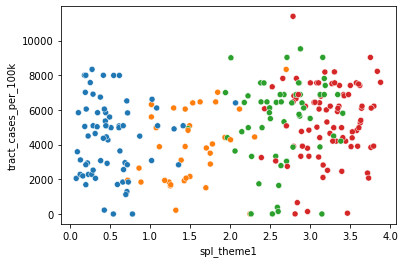

In [4]:
sns.scatterplot(x='spl_theme1', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

#### Correlation spl_theme1

In [5]:
x = train_exp.spl_theme1
y = train_exp.tract_cases_per_100k
explore.r2(x,y)

0.05696058329529423

***

#### Scatterplot ep_pov

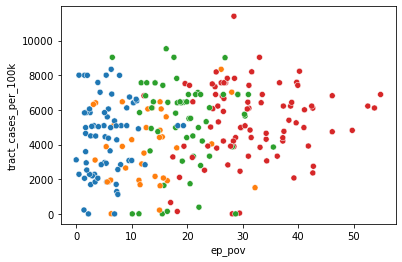

In [6]:
sns.scatterplot(x='ep_pov', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

#### Correlation ep_pov

In [7]:
x = train_exp.ep_pov
y = train_exp.tract_cases_per_100k
explore.r2(x,y)

0.04498868969657258

***

#### Scatterplot e_pov

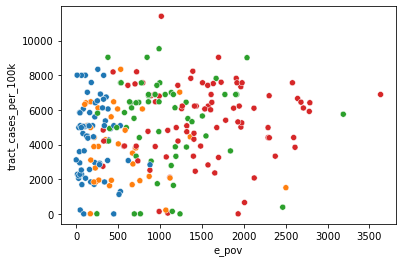

In [8]:
sns.scatterplot(x='e_pov', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

#### Correlation e_pov

In [9]:
x = train_exp.e_pov
y = train_exp.tract_cases_per_100k
explore.r2(x,y)

0.0259971510461988

In [10]:
X_train_scaled

,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_age65_comp,f_age17_comp,f_disabl_comp,f_sngpnt_comp,f_minrty_status,...,f_groupq_trans,f_soci_total_scaled,f_comp_total_scaled,f_status_total_scaled,f_trans_total_scaled,all_flags_total_scaled,rank_svi_scaled,spl_theme1_scaled,ep_pov_scaled,e_pov_scaled
236,0.0891,0,0,0,0,0,0,0,0,0,...,0,0.00,0.000000,0.0,0.25,0.1,1.000000,0.166715,0.133212,0.145334
77,0.8041,0,0,0,1,0,0,0,0,0,...,0,0.25,0.000000,0.5,0.25,0.3,0.000000,0.790449,0.490876,0.415084
193,0.8900,0,0,1,1,0,1,0,1,1,...,0,0.50,0.666667,1.0,0.00,0.6,0.000000,0.790896,0.441606,0.541151
177,0.6402,0,0,0,0,0,0,0,0,0,...,0,0.00,0.000000,0.0,0.00,0.0,0.333333,0.508302,0.489051,0.561244
7,0.4159,0,0,0,0,0,0,0,0,0,...,0,0.00,0.000000,0.5,0.50,0.3,0.666667,0.586212,0.282847,0.374622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.3548,0,0,0,0,0,0,0,0,0,...,0,0.00,0.000000,0.0,0.00,0.0,0.666667,0.273280,0.098540,0.058079
102,0.5758,0,0,0,0,0,0,0,0,0,...,0,0.00,0.000000,0.0,0.50,0.2,0.333333,0.565373,0.401460,0.133223
40,0.9334,1,0,1,1,0,0,0,0,1,...,0,0.75,0.000000,1.0,0.50,0.7,0.000000,0.906723,0.678832,0.634462
210,0.6177,0,0,0,0,0,0,0,0,0,...,0,0.00,0.000000,0.0,0.00,0.0,0.333333,0.626733,0.341241,0.175337


***

## Poverty Cluster

#### Elbow Method to estabolish k

   k        sse
0  1  46.826522
1  2  14.930835
2  3   9.444917
3  4   7.346522
4  5   6.131614
5  6   5.140396
6  7   4.547445
7  8   4.192510
8  9   3.854189


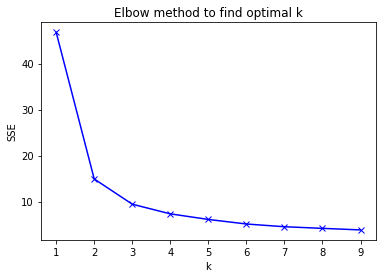

In [11]:
cluster_vars = ['spl_theme1_scaled', 'ep_pov_scaled', 'e_pov_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars)

` k = 4 `

#### Create Clusters

In [12]:
train_clusters, kmeans = explore.run_kmeans(train_exp, X_train_scaled, k=4, cluster_vars=cluster_vars, cluster_col_name = 'poverty_cluster')
test_clusters = explore.kmeans_transform(X_test_scaled, kmeans, cluster_vars, cluster_col_name = 'poverty_cluster')

#### Get Centroids

In [13]:
centroids = explore.get_centroids(cluster_vars, cluster_col_name='poverty_cluster', kmeans= kmeans)

In [14]:
X_train_scaled.shape, X_test_scaled.shape, train_exp.shape

((246, 25), (62, 25), (246, 29))

#### Append Cluster and Join Centroids

In [15]:
train_exp = explore.add_to_train(train_clusters, centroids, train_exp, cluster_col_name = 'poverty_cluster')
X_train_scaled = explore.add_to_train(train_clusters, centroids, X_train_scaled, cluster_col_name = 'poverty_cluster')
X_test_scaled = explore.add_to_train(test_clusters, centroids, X_test_scaled, cluster_col_name = 'poverty_cluster')

In [16]:
X_train_scaled.shape, X_test_scaled.shape, train_exp.shape

((246, 29), (62, 29), (246, 33))

In [17]:
X_train_scaled.head()

,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_age65_comp,f_age17_comp,f_disabl_comp,f_sngpnt_comp,f_minrty_status,...,f_trans_total_scaled,all_flags_total_scaled,rank_svi_scaled,spl_theme1_scaled,ep_pov_scaled,e_pov_scaled,poverty_cluster,centroid_spl_theme1_scaled,centroid_ep_pov_scaled,centroid_e_pov_scaled
236,0.0891,0,0,0,0,0,0,0,0,0,...,0.25,0.1,1.000000,0.166715,0.133212,0.145334,0,0.099795,0.085008,0.048500
77,0.8041,0,0,0,1,0,0,0,0,0,...,0.25,0.3,0.000000,0.790449,0.490876,0.415084,3,0.727022,0.406888,0.266358
193,0.8900,0,0,1,1,0,1,0,1,1,...,0.00,0.6,0.000000,0.790896,0.441606,0.541151,1,0.839377,0.635655,0.530122
177,0.6402,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.333333,0.508302,0.489051,0.561244,1,0.839377,0.635655,0.530122
7,0.4159,0,0,0,0,0,0,0,0,0,...,0.50,0.3,0.666667,0.586212,0.282847,0.374622,3,0.727022,0.406888,0.266358


In [18]:
X_train_scaled, X_test_scaled = wrangle.scale_data_centroid(X_train_scaled, X_test_scaled)

In [19]:
X_test_scaled.head()

,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_age65_comp,f_age17_comp,f_disabl_comp,f_sngpnt_comp,f_minrty_status,...,all_flags_total_scaled,rank_svi_scaled,spl_theme1_scaled,ep_pov_scaled,e_pov_scaled,poverty_cluster,centroid_spl_theme1_scaled,centroid_ep_pov_scaled,centroid_e_pov_scaled,poverty_cluster_scaled
203,0.9437,0,0,0,0,0,1,0,1,0,...,0.3,0.000000,0.774924,0.598540,0.796587,1,0.839377,0.635655,0.530122,0.333333
465,0.8212,0,0,0,0,0,0,0,0,0,...,0.3,0.000000,0.782529,0.503650,0.295073,3,0.727022,0.406888,0.266358,1.000000
212,0.0630,0,0,0,0,0,0,0,0,0,...,0.0,1.000000,0.114853,0.151460,0.105147,0,0.099795,0.085008,0.048500,0.000000
167,0.8070,0,0,0,1,0,1,0,0,0,...,0.5,0.000000,0.722852,0.543796,0.456097,1,0.839377,0.635655,0.530122,0.333333
178,0.7410,0,0,0,0,0,0,1,0,1,...,0.2,0.333333,0.699540,0.520073,0.289568,3,0.727022,0.406888,0.266358,1.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = MinMaxScaler(X_train_scaled.poverty_cluster)

X_train_scaled

AttributeError: 'MinMaxScaler' object has no attribute 'poverty_cluster'

In [ ]:
X_train_scaled.info()